In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans

1. Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую).

In [2]:
print(fetch_california_housing().DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [3]:
data = fetch_california_housing()

In [4]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df['MedHouseVal'] = data.target

2. Проверьте данные на наличие пропусков. Удалите их в случае обнаружения.

In [5]:
df.isna().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [6]:
for col in df.columns:
    print(df[col].sort_values().unique())

[ 0.4999  0.536   0.5495 ... 14.9009 15.     15.0001]
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36.
 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52.]
[  0.84615385   0.88888889   1.         ...  62.42222222 132.53333333
 141.90909091]
[ 0.33333333  0.375       0.44444444 ... 15.3125     25.63636364
 34.06666667]
[3.0000e+00 5.0000e+00 6.0000e+00 ... 1.6305e+04 2.8566e+04 3.5682e+04]
[6.92307692e-01 7.50000000e-01 9.70588235e-01 ... 5.02461538e+02
 5.99714286e+02 1.24333333e+03]
[32.54 32.55 32.56 32.57 32.58 32.59 32.6  32.61 32.62 32.63 32.64 32.65
 32.66 32.67 32.68 32.69 32.7  32.71 32.72 32.73 32.74 32.75 32.76 32.77
 32.78 32.79 32.8  32.81 32.82 32.83 32.84 32.85 32.86 32.87 32.88 32.89
 32.9  32.91 32.92 32.93 32.94 32.95 32.96 32.97 32.98 32.99 33.   33.01
 33.02 33.03 33.04 33.05 33.06 33.07 33.08 33.09 33.1  33.11 33.12 33.13
 33.14 33.15 33.16 33.17 33.18 33.19

Пропусков нет

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [8]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


3. Разделите выборку на обучающее и тестовое подмножества. 80% данных оставить на обучающее множество, 20% - на тестовое.

4. Постройте модель линейной регрессии. Вычислите метрики RMSE, R2 на обучающем и тестовом множестве.

In [9]:
def get_linear(model_name, df, target, size=0.2, state=42):
    from sklearn.model_selection import train_test_split
    from sklearn.linear_model import LinearRegression
    from sklearn.metrics import mean_squared_error
    
    X = df.drop(target, axis=1)
    y = df[target]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=size, random_state=state)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    r2_train = model.score(X_train, y_train)
    y_pred_train = model.predict(X_train)
    rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
    
    r2 = model.score(X_test, y_test)
    y_pred = model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    
    return pd.DataFrame({
        'model name': [model_name],
        'R2 train': [r2_train],
        'R2 test': [r2],
        'RMSE train': [rmse_train],
        'RMSE test': [rmse],
        'Features': [', '.join(df.columns)]
    })

In [10]:
results_table = get_linear('initial', df, 'MedHouseVal')

In [11]:
results_table

,model name,R2 train,R2 test,RMSE train,RMSE test,Features
0,initial,0.612551,0.575788,0.719676,0.745581,"MedInc, HouseAge, AveRooms, AveBedrms, Populat..."


5. Постройте график распределения целевой переменной. Сделайте вывод. Присутствуют ли в этом признаке выбросы?

In [12]:
sns.set_theme(rc={'figure.figsize':(12,8)})

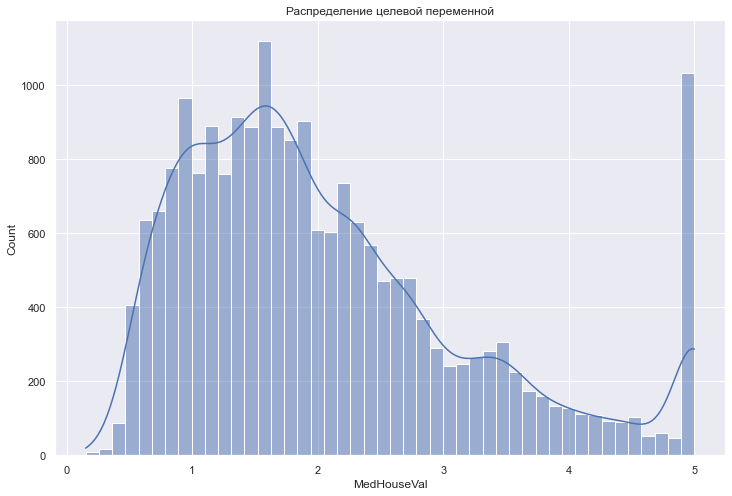

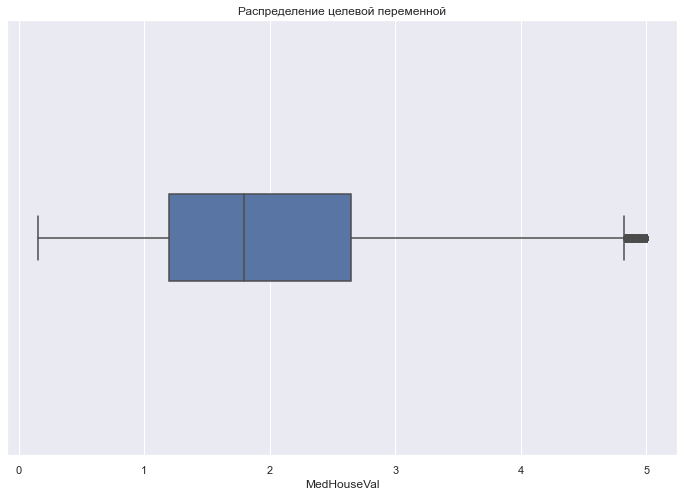

In [13]:
sns.histplot(data=df, x='MedHouseVal', kde=True)
plt.title('Распределение целевой переменной')
plt.show()

sns.boxplot(data=df, x='MedHouseVal', width=0.2)
plt.title('Распределение целевой переменной')
plt.show()

In [14]:
def outliers(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr) 
    upper_bound = q3 + (1.5 * iqr)
    check = df[~df[column].between(lower_bound, upper_bound, inclusive='both')]
    count = check[column].count()
    min_ = check[column].min()
    max_ = check[column].max()
    return f'{column} outliers - {count}, starting point - {min_}, ending point - {max_}, ' \
            f'lower bound - {lower_bound}, upper bound - {upper_bound}'

In [15]:
outliers(df, 'MedHouseVal')

'MedHouseVal outliers - 1071, starting point - 4.827, ending point - 5.00001, lower bound - -0.9808749999999995, upper bound - 4.824124999999999'

Выбросы есть в целевом признаке, начиная с точки 4.827 и до максимума, 5.00001

6. Посчитайте и выведите корреляционную матрицу. Убедитесь, что ячейки матрицы поделены на цветные категории, в ячейках указано числовое значение корреляции.

    a. Сделайте выводы.  
    b. Удалите признаки на основании полученных значений, выводов.  
    c. Повторите п. 3, п. 4 на измененных данных.

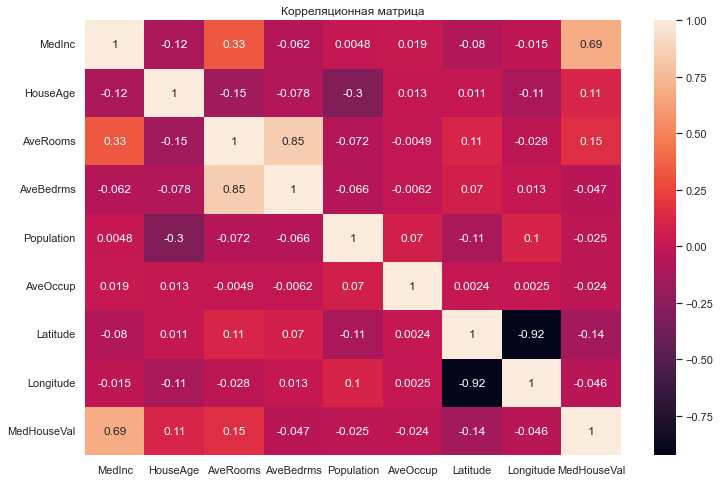

In [16]:
sns.heatmap(df.corr(), annot=True)
plt.title('Корреляционная матрица')
plt.show()

Сильная корреляция с целевым признаком у MedInc, слабая корреляция — у AveBedrms (при этом сильно скорреклированным с AveRooms), Population, AveOccup. Так же слабая корреляция с целевым признаком и, по понятным причинам, сильная корреляция между собой наблюдается у широты и долготы, Latitude и Longitude. Попробуем обучить модель без следующих признаков

In [17]:
drop = ['AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']

In [18]:
data = df.drop(drop, axis=1)
data

,MedInc,HouseAge,AveRooms,MedHouseVal
0,8.3252,41.0,6.984127,4.526
1,8.3014,21.0,6.238137,3.585
2,7.2574,52.0,8.288136,3.521
3,5.6431,52.0,5.817352,3.413
4,3.8462,52.0,6.281853,3.422
...,...,...,...,...
20635,1.5603,25.0,5.045455,0.781
20636,2.5568,18.0,6.114035,0.771
20637,1.7000,17.0,5.205543,0.923
20638,1.8672,18.0,5.329513,0.847


In [19]:
results_table = pd.concat([results_table,
                           get_linear('without weak corr', data, 'MedHouseVal')]
                         )

In [20]:
results_table

,model name,R2 train,R2 test,RMSE train,RMSE test,Features
0,initial,0.612551,0.575788,0.719676,0.745581,"MedInc, HouseAge, AveRooms, AveBedrms, Populat..."
0,without weak corr,0.515726,0.497172,0.804591,0.811733,"MedInc, HouseAge, AveRooms, MedHouseVal"


7. Исследуйте оставленные признаки на выбросы.  
    a. Удалите выбросы в случае обнаружения.  
    b. Повторите п. 3, п. 4 на измененных данных.

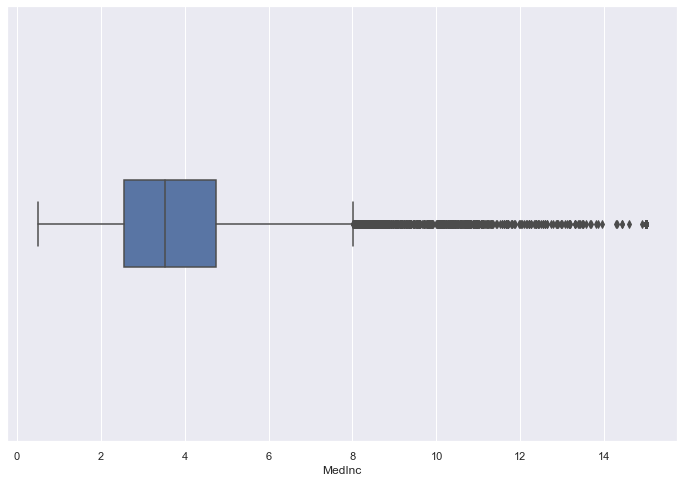

In [21]:
sns.boxplot(data=df, x='MedInc', width=0.2)
plt.show()

In [22]:
outliers(data, 'MedInc')

'MedInc outliers - 681, starting point - 8.0137, ending point - 15.0001, lower bound - -0.7063750000000004, upper bound - 8.013024999999999'

In [23]:
without_outliers = data.loc[ ~data['MedInc'].between(8.0137, 15.0001, inclusive='both') ]

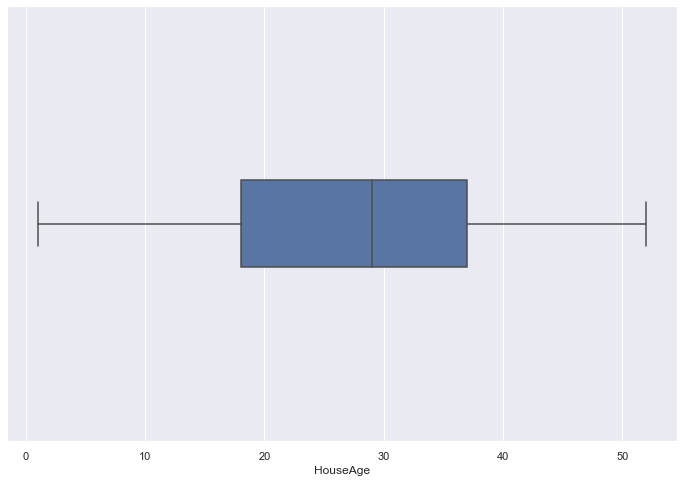

In [24]:
sns.boxplot(data=df, x='HouseAge', width=0.2)
plt.show()

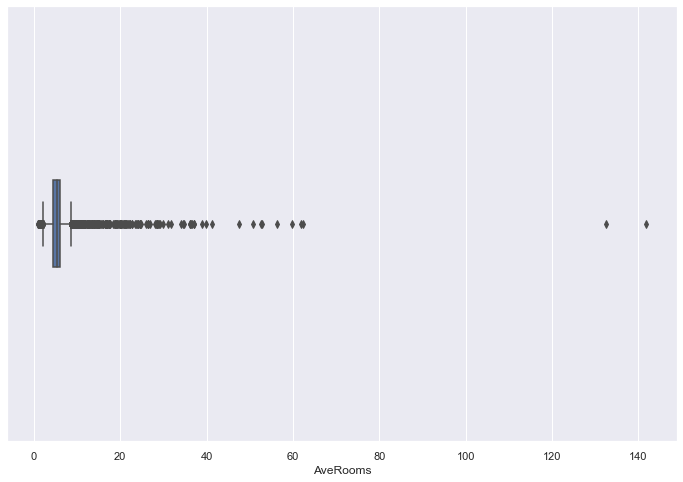

In [25]:
sns.boxplot(data=df, x='AveRooms', width=0.2)
plt.show()

In [26]:
outliers(without_outliers, 'AveRooms')

'AveRooms outliers - 439, starting point - 0.8461538461538461, ending point - 141.9090909090909, lower bound - 2.091493533500035, upper bound - 8.278004312800412'

In [27]:
without_outliers = without_outliers.loc[ ~without_outliers['AveRooms'].between(0.8461538461538461,
                                                                               2.091493533500035,
                                                                               inclusive='both') ]
without_outliers = without_outliers.loc[ ~without_outliers['AveRooms'].between(8.278004312800412,
                                                                               141.9090909090909,
                                                                               inclusive='both') ]

In [28]:
results_table = pd.concat([results_table,
                           get_linear('without outliers', without_outliers, 'MedHouseVal')]
                         )

In [29]:
results_table

,model name,R2 train,R2 test,RMSE train,RMSE test,Features
0,initial,0.612551,0.575788,0.719676,0.745581,"MedInc, HouseAge, AveRooms, AveBedrms, Populat..."
0,without weak corr,0.515726,0.497172,0.804591,0.811733,"MedInc, HouseAge, AveRooms, MedHouseVal"
0,without outliers,0.473900,0.481577,0.769105,0.767204,"MedInc, HouseAge, AveRooms, MedHouseVal"


8. Измените несколько признаков на выбор математически. Например, вычислите логарифм, возведите в квадрат, извлеките квадратный корень.  
    a. Повторите п. 3, п. 4 на измененных данных.

In [30]:
math_modified = without_outliers

In [31]:
math_modified['HouseAge'] = np.sqrt(math_modified['HouseAge'])

In [32]:
math_modified['AveRooms'] = np.log(math_modified['AveRooms'])

In [33]:
math_modified

,MedInc,HouseAge,AveRooms,MedHouseVal
3,5.6431,7.211103,1.760845,3.413
4,3.8462,7.211103,1.837665,3.422
5,4.0368,7.211103,1.560596,2.697
6,3.6591,7.211103,1.595726,2.992
7,3.1200,7.211103,1.568101,2.414
...,...,...,...,...
20635,1.5603,5.000000,1.618488,0.781
20636,2.5568,4.242641,1.810587,0.771
20637,1.7000,4.123106,1.649724,0.923
20638,1.8672,4.242641,1.673260,0.847


In [34]:
results_table = pd.concat([results_table,
                           get_linear('mathematically modified', math_modified, 'MedHouseVal')]
                         )

In [35]:
results_table

,model name,R2 train,R2 test,RMSE train,RMSE test,Features
0,initial,0.612551,0.575788,0.719676,0.745581,"MedInc, HouseAge, AveRooms, AveBedrms, Populat..."
0,without weak corr,0.515726,0.497172,0.804591,0.811733,"MedInc, HouseAge, AveRooms, MedHouseVal"
0,without outliers,0.473900,0.481577,0.769105,0.767204,"MedInc, HouseAge, AveRooms, MedHouseVal"
0,mathematically modified,0.478088,0.486099,0.766037,0.763850,"MedInc, HouseAge, AveRooms, MedHouseVal"


Для улучшения качества работы модели проведем дополнительную работу с признаками. Вернемся к начальной версии датафрейма для работы с широтой и долготой

In [36]:
lat_lon_clusters = df.drop(['AveBedrms', 'Population', 'AveOccup'], axis=1)

In [37]:
lat_lon_clusters

,MedInc,HouseAge,AveRooms,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,37.85,-122.25,3.422
...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,39.43,-121.32,0.847


In [38]:
kmeans = KMeans(n_clusters=100)
cluster = kmeans.fit_predict(lat_lon_clusters[['Latitude', 'Longitude']])
lat_lon_clusters['cluster'] = cluster

In [39]:
lat_lon_clusters = lat_lon_clusters.drop(['Latitude', 'Longitude'], axis=1)

In [40]:
lat_lon_clusters = pd.get_dummies(lat_lon_clusters, columns=['cluster'], drop_first=True)

In [41]:
lat_lon_clusters

,MedInc,HouseAge,AveRooms,MedHouseVal,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5,cluster_6,...,cluster_90,cluster_91,cluster_92,cluster_93,cluster_94,cluster_95,cluster_96,cluster_97,cluster_98,cluster_99
0,8.3252,41.0,6.984127,4.526,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8.3014,21.0,6.238137,3.585,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7.2574,52.0,8.288136,3.521,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5.6431,52.0,5.817352,3.413,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3.8462,52.0,6.281853,3.422,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,0.781,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20636,2.5568,18.0,6.114035,0.771,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20637,1.7000,17.0,5.205543,0.923,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20638,1.8672,18.0,5.329513,0.847,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
results_table = pd.concat([results_table,
                           get_linear('coordinate clusters', lat_lon_clusters, 'MedHouseVal')]
                         )

In [43]:
results_table

,model name,R2 train,R2 test,RMSE train,RMSE test,Features
0,initial,0.612551,0.575788,0.719676,0.745581,"MedInc, HouseAge, AveRooms, AveBedrms, Populat..."
0,without weak corr,0.515726,0.497172,0.804591,0.811733,"MedInc, HouseAge, AveRooms, MedHouseVal"
0,without outliers,0.473900,0.481577,0.769105,0.767204,"MedInc, HouseAge, AveRooms, MedHouseVal"
0,mathematically modified,0.478088,0.486099,0.766037,0.763850,"MedInc, HouseAge, AveRooms, MedHouseVal"
0,coordinate clusters,0.721444,0.702899,0.610219,0.623958,"MedInc, HouseAge, AveRooms, MedHouseVal, clust..."


Устранения слабо коррелированных признаков, удаление выбросов и математическая модификация признаков не привели к росту метрик, качество работы модели только ухудшалось.

К некоторому ощутимому улучшению привела попытка разбить данные на кластеры по координатам широты и долготы, в таблице виден наилучший результат работы этой модели.

В идеале хотелось бы еще поработать с координатами, извлечь из них, например, населенные пункты. Но это не удалось сделать из-за того, что данные будут слишком долго обрабатываться. Ниже закомментирован код попытки извлечения города из координат с помощью библиотеки reverse_geocoder

In [44]:
# import reverse_geocoder as revgc

In [45]:
# def get_city(row):
#     geo_data = revgc.search((row['Latitude'], row['Longitude']))
#     city = geo_data[0]['name']
#     return city

In [46]:
# lat_lon = df[['Latitude', 'Longitude']]

In [47]:
#lat_lon['city'] = lat_lon.apply(get_city, axis=1)